![](https://upload-images.jianshu.io/upload_images/8316927-0fb816f497f6e7f5.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

The purpose of this analysis is to analyze the legend history of Jodan.

# import packages

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from PIL import Image
from pyecharts.charts import Pie
from pyecharts import options as opts
%matplotlib inline
pd.set_option("display.max_column",None)
sns.set_style('white',{'font.sans-serif':['simhei','Arial']})

# Regular season data
note；Because of the historical statistic reason, There are only single-game player data from the 1985-86 season

In [78]:
df = pd.read_pickle(r"season.pkl")

In [79]:
df.columns.values

array(['球员', '赛季', '果', '比赛', '首发', '时间', '投篮', '命中', '出手', '三分', '命中.1',
       '出手.1', '罚球', '命中.2', '出手.2', '篮板', '前场', '后场', '助攻', '抢断', '盖帽',
       '失误', '犯规', '得分', 'type'], dtype=object)

In [80]:
df.rename(columns={"赛季":"season","命中":"total_hit","命中.1":"three_pointer","出手.1":"three_point_shot","命中.2":"free_throw","出手.2":"free_throw_shot"},
                inplace=True)

In [87]:
a=pd.Series([i.strip('%') for i in df['三分'].astype('str')]).astype('float').mean()/100.00
df['三分']=df['三分'].fillna('{:.2%}'.format(a))
b=pd.Series([i.strip('%') for i in df['罚球'].astype('str')]).astype('float').mean()/100.00
df['罚球']=df['罚球'].fillna('{:.2%}'.format(b))

In [90]:
df.isnull().sum()
# df_season.info()

球员                  0
season              0
果                   0
比赛                  0
首发                  0
时间                  0
投篮                  0
total_hit           0
出手                  0
三分                  0
three_pointer       0
three_point_shot    0
罚球                  0
free_throw          0
free_throw_shot     0
篮板                  0
前场                  0
后场                  0
助攻                  0
抢断                  0
盖帽                  0
失误                  0
犯规                  0
得分                  0
type                0
dtype: int64

##  Avgscores and winning rate in every season

In [92]:
df

,球员,season,果,比赛,首发,时间,投篮,total_hit,出手,三分,three_pointer,three_point_shot,罚球,free_throw,free_throw_shot,篮板,前场,后场,助攻,抢断,盖帽,失误,犯规,得分,type
1,迈克尔-乔丹,89-90,胜,骑士113-117公牛,1,50,62.2%,23,37,33.3%,2,6,91.3%,21,23,18,7,11,6,4,1,2,5,69,常规赛
2,迈克尔-乔丹,92-93,负,魔术128-124公牛,1,47,55.1%,27,49,20.0%,1,5,81.8%,9,11,6,4,2,1,5,0,2,5,64,常规赛


In [94]:
s = list(np.sort(df_season['season'].unique()))
s = s[2:] + s[:2]
s

['85-86',
 '86-87',
 '87-88',
 '88-89',
 '89-90',
 '90-91',
 '91-92',
 '92-93',
 '94-95',
 '95-96',
 '96-97',
 '97-98',
 '01-02',
 '02-03']

In [101]:
###set dummy variables and add a cols
df["win"] = df["果"].map({"胜": 1, "负": 0})
df["win"]

1      1
2      0
3      1
4      0
5      1
      ..
986    0
987    1
988    0
989    0
990    1
Name: win, Length: 990, dtype: int64

In [102]:
df.groupby(['season']).head()

,球员,season,果,比赛,首发,时间,投篮,total_hit,出手,三分,three_pointer,three_point_shot,罚球,free_throw,free_throw_shot,篮板,前场,后场,助攻,抢断,盖帽,失误,犯规,得分,type,win
1,迈克尔-乔丹,89-90,胜,骑士113-117公牛,1,50,62.2%,23,37,33.3%,2,6,91.3%,21,23,18,7,11,6,4,1,2,5,69,常规赛,1
2,迈克尔-乔丹,92-93,负,魔术128-124公牛,1,47,55.1%,27,49,20.0%,1,5,81.8%,9,11,6,4,2,1,5,0,2,5,64,常规赛,0
3,迈克尔-乔丹,86-87,胜,活塞120-125公牛,1,43,56.4%,22,39,27.86%,0,0,94.4%,17,18,7,3,4,3,3,3,5,0,61,常规赛,1
4,迈克尔-乔丹,86-87,负,老鹰117-114公牛,1,41,57.9%,22,38,0.0%,0,3,81.0%,17,21,10,5,5,1,4,1,3,3,61,常规赛,0
5,迈克尔-乔丹,87-88,胜,活塞110-112公牛,1,42,77.8%,21,27,0.0%,0,1,89.5%,17,19,4,2,2,6,2,2,1,4,59,常规赛,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,迈克尔-乔丹,85-86,胜,子弹103-105公牛,1,37,33.3%,12,36,0.0%,0,1,70.0%,7,10,5,1,4,2,3,1,2,5,31,常规赛,1
478,迈克尔-乔丹,94-95,胜,热火93-98公牛,1,40,42.9%,9,21,27.86%,0,0,81.3%,13,16,5,0,5,4,3,0,1,2,31,常规赛,1
488,迈克尔-乔丹,85-86,胜,老鹰97-102公牛,0,31,47.6%,10,21,66.7%,2,3,88.9%,8,9,3,1,2,3,1,1,4,1,30,常规赛,1
489,迈克尔-乔丹,85-86,负,老鹰131-118公牛,1,33,48.0%,12,25,0.0%,0,2,100.0%,6,6,6,1,5,6,2,1,7,2,30,常规赛,0


In [104]:
df.head()

,球员,season,果,比赛,首发,时间,投篮,total_hit,出手,三分,three_pointer,three_point_shot,罚球,free_throw,free_throw_shot,篮板,前场,后场,助攻,抢断,盖帽,失误,犯规,得分,type,win
1,迈克尔-乔丹,89-90,胜,骑士113-117公牛,1,50,62.2%,23,37,33.3%,2,6,91.3%,21,23,18,7,11,6,4,1,2,5,69,常规赛,1
2,迈克尔-乔丹,92-93,负,魔术128-124公牛,1,47,55.1%,27,49,20.0%,1,5,81.8%,9,11,6,4,2,1,5,0,2,5,64,常规赛,0
3,迈克尔-乔丹,86-87,胜,活塞120-125公牛,1,43,56.4%,22,39,27.86%,0,0,94.4%,17,18,7,3,4,3,3,3,5,0,61,常规赛,1
4,迈克尔-乔丹,86-87,负,老鹰117-114公牛,1,41,57.9%,22,38,0.0%,0,3,81.0%,17,21,10,5,5,1,4,1,3,3,61,常规赛,0
5,迈克尔-乔丹,87-88,胜,活塞110-112公牛,1,42,77.8%,21,27,0.0%,0,1,89.5%,17,19,4,2,2,6,2,2,1,4,59,常规赛,1


In [112]:
wining_rate = df.groupby(["season"])["win"].mean().values
wining_rate
#ordered by season values

array([0.5       , 0.45121951, 0.5       , 0.48780488, 0.6097561 ,
       0.58024691, 0.67073171, 0.74390244, 0.8375    , 0.71794872,
       0.76470588, 0.87804878, 0.84146341, 0.75609756])

In [113]:
df.head()

,球员,season,果,比赛,首发,时间,投篮,total_hit,出手,三分,three_pointer,three_point_shot,罚球,free_throw,free_throw_shot,篮板,前场,后场,助攻,抢断,盖帽,失误,犯规,得分,type,win
1,迈克尔-乔丹,89-90,胜,骑士113-117公牛,1,50,62.2%,23,37,33.3%,2,6,91.3%,21,23,18,7,11,6,4,1,2,5,69,常规赛,1
2,迈克尔-乔丹,92-93,负,魔术128-124公牛,1,47,55.1%,27,49,20.0%,1,5,81.8%,9,11,6,4,2,1,5,0,2,5,64,常规赛,0
3,迈克尔-乔丹,86-87,胜,活塞120-125公牛,1,43,56.4%,22,39,27.86%,0,0,94.4%,17,18,7,3,4,3,3,3,5,0,61,常规赛,1
4,迈克尔-乔丹,86-87,负,老鹰117-114公牛,1,41,57.9%,22,38,0.0%,0,3,81.0%,17,21,10,5,5,1,4,1,3,3,61,常规赛,0
5,迈克尔-乔丹,87-88,胜,活塞110-112公牛,1,42,77.8%,21,27,0.0%,0,1,89.5%,17,19,4,2,2,6,2,2,1,4,59,常规赛,1


Text(0.5, 0, 'Season')

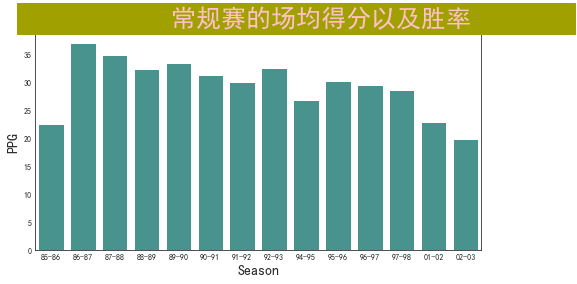

In [29]:
fig,ax = plt.subplots(figsize=(8,4))
fig.text(x=0.1, y=0.9, s='            常规赛的场均得分以及胜率        ', 
         fontsize=25, weight='bold', color='pink', backgroundcolor='#a0a000')
sns.barplot(x="season",y="score",data=df,order=season,ci=None,color="#3c9f99")
plt.tick_params(labelsize=8,axis="both",direction="in")
plt.ylabel("PPG",fontsize=14)
plt.xlabel("Season",fontsize=14)

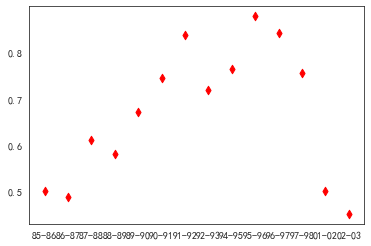

In [30]:
plt.scatter(x=season,y=wining_rate,color="r",marker='d')

Text(0, 0.5, '胜率')

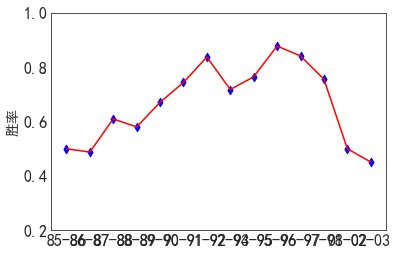

In [31]:
ax2=ax.twinx()
plt.scatter(x=season,y=wining_rate,color="b",marker='d')
plt.plot(season,wining_rate,color="r")#line
plt.tick_params(labelsize=16,axis="both",direction="in")
ax2.set_yticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.ylim(0.2,1)
plt.ylabel("胜率",fontsize=14)

## 单场比赛各个得分段占比

In [115]:
interval

['20分及以下', '20-30', '30-40', '40-50', '大于50']

In [116]:
value

30-40     0.357576
20-30     0.348485
20分及以下    0.159596
40-50     0.109091
大于50      0.025253
Name: 得分, dtype: float64

In [126]:
pd.cut(df['得分'], bins=[0,20,25,30,40,50],labels=interval).value_counts()

40-50     354
30-40     202
20分及以下    158
20-30     143
大于50      108
Name: 得分, dtype: int64

In [125]:
interval = ["20分及以下","20-30","30-40","40-50","大于50"]
value = pd.cut(df_season["得分"],bins=[0,20,30,40,50,100],labels=interval).value_counts()
value

30-40     354
20-30     345
20分及以下    158
40-50     108
大于50       25
Name: 得分, dtype: int64

In [40]:
value2 = pd.cut(df_season["得分"],bins=[0,20,30,40,50,100],labels=interval).value_counts(normalize=False)[interval].values

In [41]:
value1

30-40     354
20-30     345
20分及以下    158
40-50     108
大于50       25
Name: 得分, dtype: int64

In [42]:
value2

array([158, 345, 354, 108,  25], dtype=int64)

In [54]:
pie = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(interval, value)],
        center=["50%", "50%"],
        #radius=["50%","75%"]
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="The percentage of scores per  ",pos_left="center"),
        legend_opts=opts.LegendOpts(
                is_show=False
            )
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%")))

In [55]:
pie.render_notebook()

## 乔丹的进攻偏好

In [63]:
df_season["两分出手"] = df_season["总出手"]-df_season["三分出手"]

In [64]:
two_point_select= df_season["两分出手"].sum()/df_season["总出手"].sum()
three_point_select = 1-two_point_select
two_point_ratio = (df_season["得分"]-df_season["三分命中"]*3-df_season["罚球命中"]).sum()/df_season["得分"].sum()
free_throw_ratio = df_season["罚球命中"].sum()/df_season["得分"].sum()
three_point_ratio = 1-two_point_ratio-free_throw_ratio                                                                 

In [65]:
pie = (
    Pie()
     .add(
        "",
        [("两分球",two_point_ratio),("三分球",three_point_ratio),("罚球",free_throw_ratio)],
        #[list(z) for z in zip(education.index, np.round(education.values,4))],
        center=["33%", "50%"],
        #radius=["50%","75%"]
    )
    .add(
        "",
        [("两分出手",two_point_select),("三分出手",three_point_select)],
        #[list(z) for z in zip(education.index, np.round(education.values,4))],
        center=["78%", "50%"],
       #radius=["50%","75%"]
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="得分来源占比（左）和出手选择占比（右）",pos_left="35%"),
        legend_opts=opts.LegendOpts(
                is_show=False
            )
    
    )
   
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%")))

In [66]:
pie.render_notebook()

## 生涯对各个球队的对战情况（场均得分、胜率）柱状图

In [67]:
pattern = re.compile(r'[\u4E00-\u9FA5]+')
df_season["team_list"] = df_season["比赛"].str.findall(pattern).map(set)

In [68]:
def get_opp(x,num=0):
    period_dict = {0:"公牛",1:"奇才"}
    opp = (x-set([period_dict[num]])).pop()
    if opp == "人":
        return "76人"
    elif opp == "凯尔特":
        return "凯尔特人"
    elif opp == "超音速":
        return "雷霆"
    elif opp == "子弹":
        return "奇才"
    else:
        return opp
df_season.loc[~df_season["赛季"].isin(["01-02","02-03"]),"opp"] = df_season["team_list"].map(lambda x : get_opp(x,0))
df_season.loc[df_season["赛季"].isin(["01-02","02-03"]),"opp"] = df_season["team_list"].map(lambda x : get_opp(x,1))

Text(0, 0.5, '')

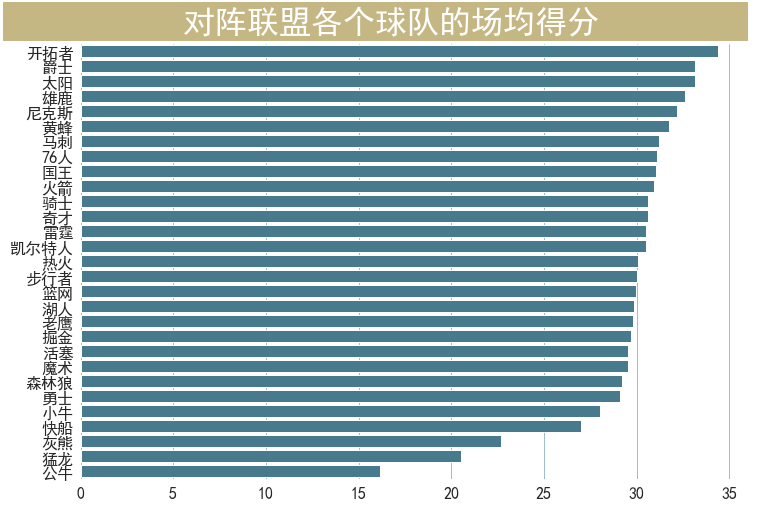

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
order = df_season.groupby("opp")["得分"].mean().sort_values(ascending=False).index
sns.barplot(y="opp",x = "得分",order=order,data=df_season,color='#3c7f99',ci=None)
plt.box(False)
fig.text(x=0.04, y=0.90, s='           对阵联盟各个球队的场均得分         ', 
         fontsize=32, weight='bold', color='white', backgroundcolor='#c5b783')
plt.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.grid(which='both', linewidth=0.5, color='#3c7f99')
plt.xlabel('')
plt.ylabel('')

Text(0, 0.5, '')

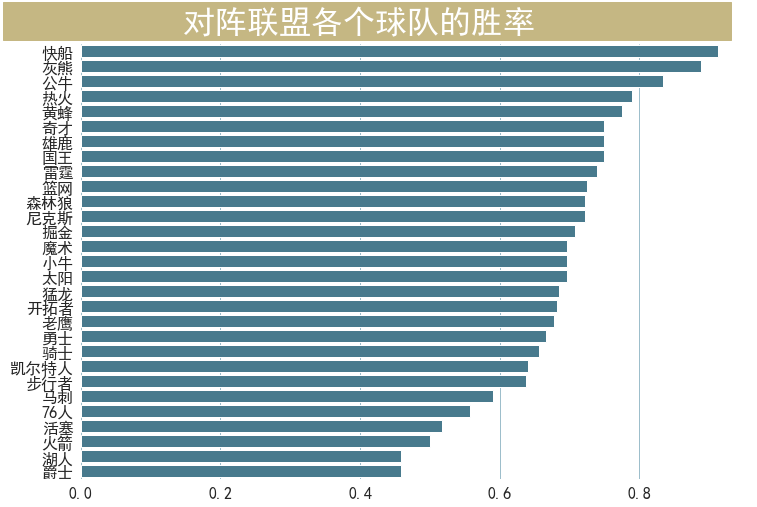

In [69]:
fig, ax = plt.subplots(figsize=(12,8))
order = df_season.groupby("opp")["win"].mean().sort_values(ascending=False).index
sns.barplot(y="opp",x = "win",order=order,data=df_season,color='#3c7f99',ci=None)
plt.box(False)
fig.text(x=0.04, y=0.90, s='           对阵联盟各个球队的胜率            ', 
         fontsize=32, weight='bold', color='white', backgroundcolor='#c5b783')
plt.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.grid(which='both', linewidth=0.5, color='#3c7f99')
# plt.xticks([0.2,0.4,0.6,0.8,1.0])
plt.xlabel('')
plt.ylabel('')

## 常规赛胜负的分差状况

In [71]:
pattern = re.compile("(\d+)-(\d+)")
df_season["diff"] = df_season["比赛"].str.findall(pattern).map(lambda x : np.abs(int(x[0][0])-int(x[0][1])))

Text(0, 0.5, '比赛结果')

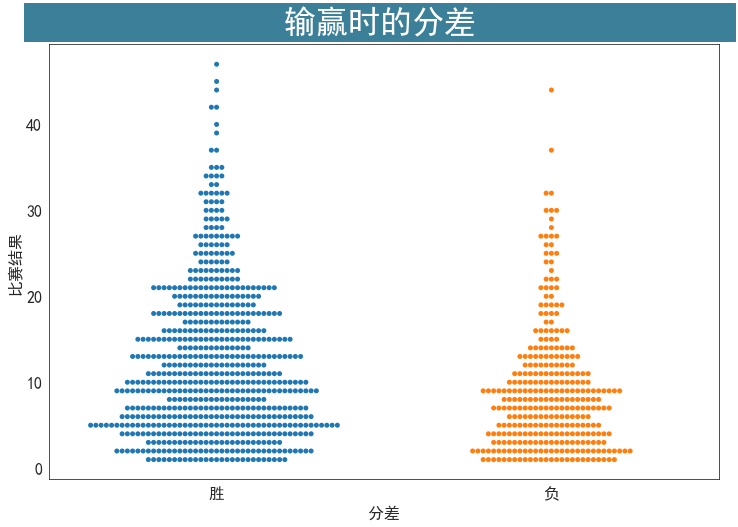

In [72]:
fig, ax = plt.subplots(figsize=(12,8))
sns.swarmplot(x="果",y="diff",data=df_season) 
fig.text(x=0.1, y=0.90, s='                输赢时的分差                ', 
         fontsize=32, weight='bold', color='white', backgroundcolor='#3c7f99')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel("分差",fontsize=16)
plt.ylabel("比赛结果",fontsize=16)

# 季后赛数据分析

In [21]:
df_playoff = pd.read_excel("./data/playoff.xls")

## 乔丹的季后赛之路

In [22]:
df_playoff["win"] = df_playoff["果"].map({"胜":1,"负":0})

In [23]:
pattern = re.compile(r'[\u4E00-\u9FA5]+')
df_playoff["team_list"] = df_playoff["比赛"].str.findall(pattern).map(set)
df_playoff.loc[:,"opp"] = df_playoff["team_list"].map(lambda x : get_opp(x,0))

In [24]:
df_plot = df_playoff.groupby(["赛季","轮次","opp"])["win"].mean().reset_index()

In [25]:
season_dict = dict(zip(df_plot["赛季"].unique(),[i for i in range(12)]))
df_plot["season"] = df_plot["赛季"].map(season_dict) 

In [26]:
horizon = [0.11,0.18,0.24,0.30,0.37,0.43,0.50,0.56,0.63,0.69,0.76,0.82]
vertical = [0.13,0.35,0.58,0.79]

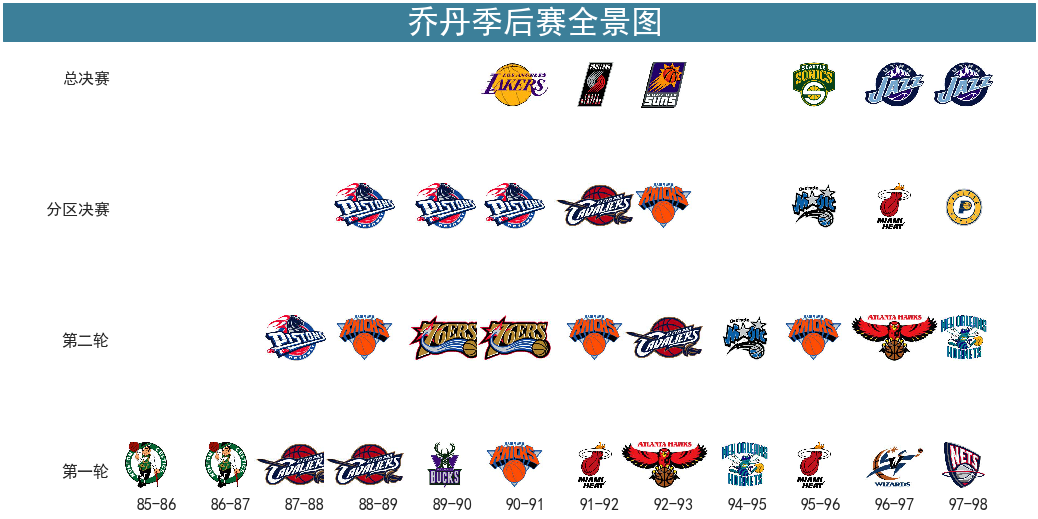

In [27]:
fig, ax = plt.subplots(figsize=(16, 8))
fig.text(x=0.03, y=0.92, s='                         Postseason panorama                       ', fontsize=32, 
         weight='bold', color='white', backgroundcolor='#3c7f99')
plt.scatter(df_plot["赛季"], df_plot["轮次"], alpha=0.35)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.box(False)
plt.yticks([1,2,3,4],labels=["第一轮","第二轮","分区决赛","总决赛"])
for point in range(len(df_plot)):
    season = df_plot.iloc[point,4]
    round_ = df_plot.iloc[point,1]-1 
    team_name = df_plot.iloc[point,2]
    left,bottom,width,height = horizon[season], vertical[round_],0.08,0.08
    ax2 = fig.add_axes([left,bottom,width,height])
    img = Image.open("./picture/{team_name}.jpg".format(team_name=team_name))
    ax2.imshow(img)
    ax2.axis('off') # 关掉坐标轴为 off
    

## 季后赛各轮次的输赢分差

In [73]:
pattern = re.compile("(\d+)-(\d+)")
df_playoff["diff"] = df_playoff["比赛"].str.findall(pattern).map(lambda x : np.abs(int(x[0][0])-int(x[0][1])))

NameError: name 'df_playoff' is not defined

In [29]:
color = df_playoff["果"].map({"胜":"#e60000","负":"#73e68c"})

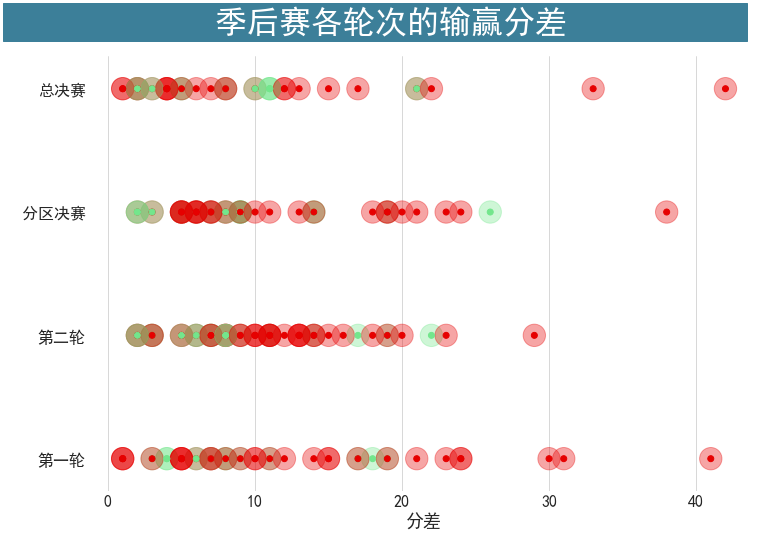

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.text(x=0.03, y=0.92, s='             季后赛各轮次的输赢分差           ', fontsize=32, 
         weight='bold', color='white', backgroundcolor='#3c7f99')
plt.yticks([1,2,3,4],labels=["第一轮","第二轮","分区决赛","总决赛"])
plt.scatter(df_playoff["diff"], df_playoff["轮次"], alpha=0.35,c=color,s=500)
plt.scatter(df_playoff["diff"], df_playoff["轮次"], c=color)
plt.tick_params(axis='both', which='both', length=0)
plt.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.grid(which='both', linewidth=0.75)
#plt.xticks(np.arange(0,61,10), [str(i)+"k" for i in range(0,61,10)])
plt.xlabel('分差', fontsize=18)
plt.box(False)
#seed_scale_plot()

## 常规赛和季后赛场均得分对比

In [31]:
season_score = df_season.groupby("赛季")["得分"].mean().values[2:]
playoff_score = df_playoff.groupby("赛季")["得分"].mean().values
index = df_playoff.groupby("赛季")["得分"].mean().index

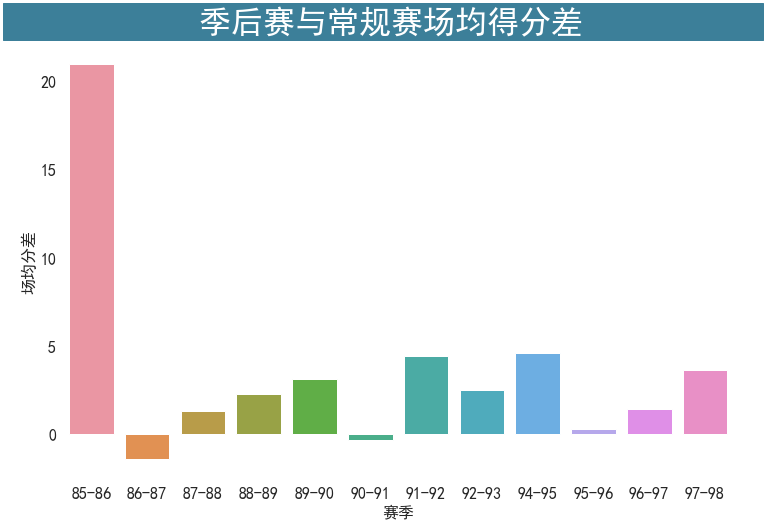

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=index,y=playoff_score-season_score)
fig.text(x=0.06, y=0.90, s='            季后赛与常规赛场均得分差           ', 
         fontsize=32, weight='bold', color='white', backgroundcolor='#3c7f99')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel("赛季",fontsize=16)
plt.ylabel("场均分差",fontsize=16)
plt.box(False)